In [1]:
import pandas as pd
from tfidf import *
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [2]:
df = pd.read_csv("data_viz_survey.csv")

In [3]:
df

,Timestamp,In one sentence describe how you feel about this program. (for sentiment analysis),Which programming language are you most comfortable using to make data visualizations?,What is your favorite type of plot to make?,Are you colorblind?,How old are you?,Where are you from?,How difficult is it for you to make a barplot?,What's your favorite visualization package?,How difficult is it for you to make a boxplot?,How difficult is it for you to make a line graph?,How difficult is it for you to make a stacked area graph?,What are you most excited to learn about in this class?,What are you least excited about in this class?,What is one type of plot that you're curious about but haven't made before?,What do you want to get out of this class?,How many hours a week do you expect to spend on hw for this course?,"How interested are you in participating in data visualization competitions (on reddit, kaggle, etc) as part of this course?",How comfortable are you doing a presentation in front of 40-80 people?
0,3/19/2019 11:07:46,.......:),python,NaN,No,23.0,...,1,NaN,1.0,1,2.0,..,presentation,////,...,0.0,1,1
1,3/19/2019 11:08:26,intensive but happy.,Python,Histogram,No,26.0,China,1,NaN,2.0,1,4.0,data visualization with real word applications.,no idea yet,dynamic plotting,to learn what is needed for a data scientist,2.0,5,4
2,3/19/2019 11:08:57,It's intensive and the courses are helpful.,python,Scatterplot,No,28.0,Taiwan,2,NaN,3.0,1,4.0,Create cool visualization,Learn to create amazing visualization from the...,bubble plots,I hope I can visualize data fluently,4.0,5,3
3,3/19/2019 11:09:19,I really enjoy the program and the whole atmos...,Python,Histogram,No,29.0,Russia,2,NaN,3.0,1,4.0,Powerful and easy visualization libraries,not studying JS for data viz,Bubble chart,Getting used to making cool visualizations in ...,4.0,3,4
4,3/19/2019 11:09:26,Stressful,Python,Histogram,No,26.0,china,2,NaN,3.0,1,3.0,Interactive graphs,Assignments,3d visualizations,Data visualization principles,7.0,4,5
5,3/19/2019 11:09:41,Tired,R,Scatterplot,No,16.0,Hong Kong,1,Option 1,4.0,2,5.0,Data Vis Package in Python,Complex Viz,Ballon Graph,Easy A,10.0,1,3
6,3/19/2019 11:09:38,Challenging so fruitful.,Python,Histogram,No,24.0,China,1,NaN,2.0,1,2.0,Presentation skill,Tuning details on the plots.,3D map in Python,A nice visualization of the projects I have do...,2.0,1,5
7,3/19/2019 11:09:59,I feel stressed,Python,Histogram,No,24.0,"Chicago, IL",1,ggplot,3.0,1,5.0,D3.js,Learning d3 and building a portfolio,Heat maps or geospatial graphs,I want to learn d3,3.0,5,3
8,3/19/2019 11:10:00,exhausted,NaN,Histogram,No,28.0,Armenia,3,matplotlib,4.0,3,5.0,everything that is taught,presenting every week and sitting through 2 ho...,word cloud,I want to become fluent in data visualization ...,6.0,2,2
9,3/19/2019 11:10:09,"Intensive and stressful, but i like it",Python,Barplot,No,25.0,China,1,"matplotlib, seaborn",1.0,1,2.0,data viz,only one day to finish the homework,bars on a map,some cool data viz skills,3.0,3,4


In [4]:
answers = [answer for answer in df['In one sentence describe how you feel about this program. (for sentiment analysis)']]

In [5]:
tfidf_vectorizor = compute_tfidf(answers)

In [6]:
tfidf_scores = tfidf_vectorizor.transform(answers)

In [7]:
tfidf_scores

<84x150 sparse matrix of type '<class 'numpy.float64'>'
	with 247 stored elements in Compressed Sparse Row format>

In [8]:
tfidf_scores.sum(axis=0).tolist()[0]

[0.5937517833026136,
 0.408248290463863,
 1.5216104798148884,
 0.5535110861596833,
 0.40844156965827044,
 0.45470763474567355,
 0.9369572937268973,
 0.2876190361033694,
 1.0,
 0.3876599481354277,
 1.0375675662595356,
 0.6322745734431995,
 2.18982126232521,
 0.4463893579757704,
 0.789462166792851,
 0.6322745734431995,
 0.40844156965827044,
 0.3965100556191434,
 0.43554669131726736,
 0.4463893579757704,
 0.4709001860438772,
 3.4277674004533814,
 0.45470763474567355,
 0.6789542515321016,
 1.1134432590452936,
 0.42265422723621665,
 1.0,
 0.3876599481354277,
 0.6141360934576103,
 0.9205203545757785,
 0.6005289101465954,
 0.7071067811865476,
 0.5337875697016626,
 0.42265422723621665,
 0.6339890269304954,
 0.42265422723621665,
 0.6141360934576103,
 0.45470763474567355,
 2.0,
 0.5313410122549641,
 0.5937517833026136,
 0.7640014404574496,
 1.0,
 0.45470763474567355,
 3.835592759444319,
 2.7853466237018685,
 0.5330083924439238,
 0.7928315035003755,
 0.3876599481354277,
 1.5018093869582483,
 0.46

In [9]:
tfidf_dict = dict(zip(tfidf_vectorizor.vocabulary_, tfidf_scores.sum(axis=0).tolist()[0]))

In [10]:
tfidf_dict

{'intensive': 0.5937517833026136,
 'happy': 0.408248290463863,
 'courses': 1.5216104798148884,
 'helpful': 0.5535110861596833,
 'really': 0.40844156965827044,
 'enjoy': 0.45470763474567355,
 'program': 0.9369572937268973,
 'atmosphere': 0.2876190361033694,
 'classes': 1.0,
 'collaborative': 0.3876599481354277,
 'challenging': 1.0375675662595356,
 'time': 0.6322745734431995,
 'stressful': 2.18982126232521,
 'tired': 0.4463893579757704,
 'fruitful': 0.789462166792851,
 'feel': 0.6322745734431995,
 'stressed': 0.40844156965827044,
 'exhausted': 0.3965100556191434,
 'like': 0.43554669131726736,
 'fun': 0.4463893579757704,
 'intense': 0.4709001860438772,
 'cool': 3.4277674004533814,
 'nervous': 0.45470763474567355,
 'excited': 0.6789542515321016,
 'brutal': 1.1134432590452936,
 'good': 0.42265422723621665,
 'great': 1.0,
 'far': 0.3876599481354277,
 'slightly': 0.6141360934576103,
 'disappointed': 0.9205203545757785,
 'exhausting': 0.6005289101465954,
 'insightful': 0.7071067811865476,
 'co

In [11]:
wc = WordCloud(background_color="white", max_words=1000)

In [12]:
wc.generate_from_frequencies(tfidf_dict)

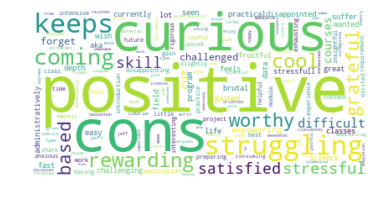

In [13]:
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


## REDO

In [14]:
tokenized_answers = [tokenize(answer) for answer in df['In one sentence describe how you feel about this program. (for sentiment analysis)']]

In [15]:
all_words = [item for sublist in tokenized_answers for item in sublist]

In [16]:
all_words = list(filter(lambda a: a != 'program', all_words))
all_words = ["intense" if x =='intensive' else x for x in all_words ]

In [17]:
freq_dict= {i:all_words.count(i)*(1.0/len(all_words)) for i in set(all_words)}

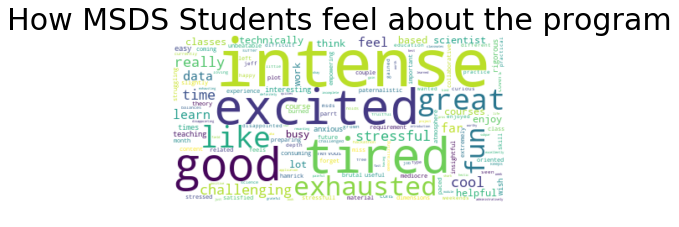

In [22]:
wc = WordCloud(background_color="white", max_words=1000)
wc.generate_from_frequencies(freq_dict)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("How MSDS Students feel about the program",fontdict={'fontsize':30})
plt.show()
